# Data Preprocessing

In [26]:
import pandas as pd

data = pd.read_csv('./datasets/bike_sharing.csv')
data.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [27]:
missing_data = data.isnull().sum()
print(missing_data)

#checking for missing data

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [28]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['hour'] = data['datetime'].dt.hour
data['day'] = data['datetime'].dt.day
data['month'] = data['datetime'].dt.month
data['year'] = data['datetime'].dt.year
# extracting features like hour, day, month, year

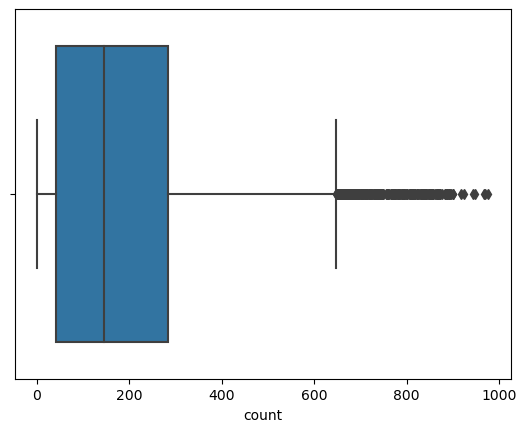

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=data['count'])
plt.show()

#many outliers present but this could just be due to special events or rush hour 

In [30]:
data['calculated_count'] = data['casual'] + data['registered']

all_rows_match = (data['calculated_count'] == data['count']).all()
print(all_rows_match)

#ensuring that the count column is indeed the sum of the casual and registered columns

True


# Exploratory Data Analysis


In [31]:
data.describe()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year,calculated_count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613,9.992559,6.521495,2011.501929,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838,5.476608,3.444373,0.500019,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2011.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000,5.000000,4.000000,2011.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000,10.000000,7.000000,2012.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000,15.000000,10.000000,2012.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000,19.000000,12.000000,2012.000000,977.000000


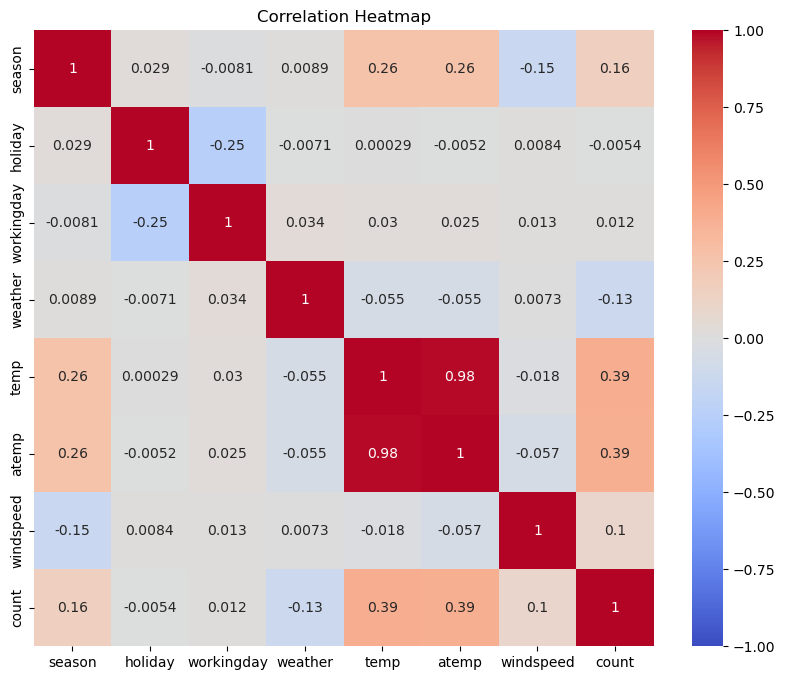

In [32]:
selected_columns = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'windspeed', 'count']
correlation_data = data[selected_columns]

corr_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

# Regression Analysis

In [33]:
from sklearn.model_selection import train_test_split

X = data[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']]
y = data['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#creating the first regression model

In [34]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     382.5
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:30:07   Log-Likelihood:                -56305.
No. Observations:                8708   AIC:                         1.126e+05
Df Residuals:                    8699   BIC:                         1.127e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.6216      9.724     14.152      0.0

In [35]:
X_2 = data[['season', 'holiday', 'workingday', 'weather', 'atemp', 'windspeed']]
y_2 = data['count']

#got rid of temp and humidity to avoid multicollinearity

In [36]:
X_const_2 = sm.add_constant(X_2)

model_new = sm.OLS(y_2, X_const_2).fit()
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     413.9
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:30:07   Log-Likelihood:                -70926.
No. Observations:               10886   AIC:                         1.419e+05
Df Residuals:                   10879   BIC:                         1.419e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.7849      7.436     -3.333      0.0

In [37]:
X_3 = data[['season', 'holiday', 'workingday', 'weather', 'atemp', 'windspeed', 'hour', 'year']]
y_3 = data['count']

# added hour and year predictors

In [38]:
X_const_3 = sm.add_constant(X_3)

model_new = sm.OLS(y_3, X_const_3).fit()
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     756.6
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:30:08   Log-Likelihood:                -69637.
No. Observations:               10886   AIC:                         1.393e+05
Df Residuals:                   10877   BIC:                         1.394e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.786e+05   5612.993    -31.824      0.0

In [39]:
# One-hot encode the 'season' column
data_encoded = pd.get_dummies(data, columns=['season'], prefix='season')

In [40]:
X_encoded = data_encoded[['season_1', 'season_2', 'season_3', 'season_4', 'holiday', 'workingday', 'weather', 'atemp', 'windspeed', 'hour', 'year']]
y_encoded = data_encoded['count']

In [41]:
X_const_encoded = sm.add_constant(X_encoded)

model_encoded = sm.OLS(y_encoded, X_const_encoded).fit()

print(model_encoded.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     624.5
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:30:08   Log-Likelihood:                -69576.
No. Observations:               10886   AIC:                         1.392e+05
Df Residuals:                   10875   BIC:                         1.393e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.402e+05   4479.325    -31.292      0.0

In [42]:
X = data_encoded[['season_1', 'season_2', 'season_3', 'season_4', 'holiday', 'workingday', 'weather', 'atemp', 'windspeed', 'hour', 'year']]
y = data_encoded['count']

# Split the data into training and testing sets and create new model using the same predictors as the previous model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
X_const_train = sm.add_constant(X_train)

model_train = sm.OLS(y_train, X_const_train).fit()

print(model_train.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     496.7
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:30:08   Log-Likelihood:                -55650.
No. Observations:                8708   AIC:                         1.113e+05
Df Residuals:                    8697   BIC:                         1.114e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.367e+05   5002.245    -27.337      0.0

In [44]:
# Add constant to the testing data
X_const_test = sm.add_constant(X_test)

# Make predictions
y_pred = model_train.predict(X_const_test)

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Root Mean Squared Error (RMSE): 144.846521861537
Mean Absolute Error (MAE): 109.38882541518412


In [46]:

Q1 = data['count'].quantile(0.25)

Q3 = data['count'].quantile(0.75)

IQR = Q3 - Q1

print(IQR)

242.0
